# Analyse Sales Report


---------------------------------------------------------------------------
TotalSales AverageSales TotalMonths MinSale MinSaleMonth MaxSale MaxSaleMonth

 [45542, 3795.1666666666665, 12, 1521, 'feb', 7479, 'dec']

Above displayed Sales summary details updated to a file :
 /Users/amruta/python_local/pythonCFG/outputFiles/salesSummary.csv

---------------------------------------------------------------------------


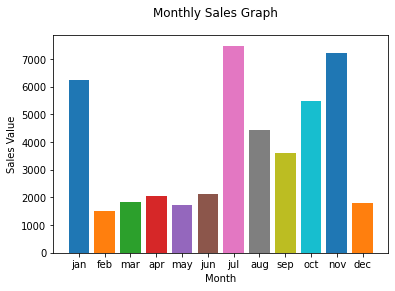

In [1]:
import csv, os
import matplotlib.pyplot as plt

filePath = "/Users/amruta/python_local/pythonCFG/"

def read_csvdata():
    salesData = []
    
    with open(os.path.join(filePath,"inputFiles/sales.csv"),'r') as salesCsvFH:
        resultSpreadsheet = csv.DictReader(salesCsvFH)
        for row in resultSpreadsheet:
            salesData.append(row)

    return salesData

def sales_calculation():
    inputData =  read_csvdata()
    salesList = []

    for row in inputData:
        salesData = int(row['sales'])     
        salesList.append(salesData)
    
    totalSales = sum(salesList)
    monthsCount = len(salesList)
    avgSales = totalSales / monthsCount
    minSales = min(salesList)
    maxSales = max(salesList)
    
    for month in inputData:
        if minSales == int(month['sales']):
            minSaleMonth = month['month']
        elif maxSales == int(month['sales']):
            maxSaleMonth = row['month']
        else:
            exit
    
    return [totalSales, avgSales, monthsCount, minSales, minSaleMonth, maxSales, maxSaleMonth]
    

def month_sales_values():
    monthAndSalesData =  read_csvdata()
    monthAndSalesDict = {}
    

    for row in monthAndSalesData:
        salesAndMonthData = {(row['month']):int(row['sales'])}  
        monthAndSalesDict.update(salesAndMonthData)
        
    return monthAndSalesDict

def sales_summary_to_file():
    outputSales = sales_calculation()
    header = ['TotalSales','AverageSales','TotalMonths','MinSale','MinSaleMonth','MaxSale','MaxSaleMonth']
    

    with open(os.path.join(filePath,"outputFiles/salesSummary.csv"),'w') as sendOutputFH:
        writer = csv.writer(sendOutputFH)
        writer.writerow(header)
        writer.writerow(outputSales)
        
    print("\n---------------------------------------------------------------------------")
    print('TotalSales AverageSales TotalMonths MinSale MinSaleMonth MaxSale MaxSaleMonth')
    print("\n",outputSales)
    print("\nAbove displayed Sales summary details updated to a file :\n {}".format(os.path.join(filePath,"outputFiles/salesSummary.csv")))
    print("\n---------------------------------------------------------------------------")
        
    return header
        
def sales_graph():
    monthSalesDictVal = month_sales_values()
    
    for month,sale in monthSalesDictVal.items():
        plt.bar(month,sale,align='center')
        plt.suptitle('Monthly Sales Graph')
        plt.xlabel("Month")
        plt.ylabel("Sales Value")
       
    
sales_summary_to_file()
sales_graph()